In [1]:
import glob
import act

In [2]:
files = glob.glob('/data/datastream/kcg/kcgaosuhsasS3.b1/*.2024082*')
files

['/data/datastream/kcg/kcgaosuhsasS3.b1/kcgaosuhsasS3.b1.20240828.000004.nc',
 '/data/datastream/kcg/kcgaosuhsasS3.b1/kcgaosuhsasS3.b1.20240829.000003.nc',
 '/data/datastream/kcg/kcgaosuhsasS3.b1/kcgaosuhsasS3.b1.20240824.000005.nc',
 '/data/datastream/kcg/kcgaosuhsasS3.b1/kcgaosuhsasS3.b1.20240827.000004.nc',
 '/data/datastream/kcg/kcgaosuhsasS3.b1/kcgaosuhsasS3.b1.20240825.000005.nc',
 '/data/datastream/kcg/kcgaosuhsasS3.b1/kcgaosuhsasS3.b1.20240826.000004.nc',
 '/data/datastream/kcg/kcgaosuhsasS3.b1/kcgaosuhsasS3.b1.20240822.000006.nc',
 '/data/datastream/kcg/kcgaosuhsasS3.b1/kcgaosuhsasS3.b1.20240821.000007.nc',
 '/data/datastream/kcg/kcgaosuhsasS3.b1/kcgaosuhsasS3.b1.20240823.000006.nc',
 '/data/datastream/kcg/kcgaosuhsasS3.b1/kcgaosuhsasS3.b1.20240820.000007.nc']

In [3]:
ds = act.io.read_arm_netcdf(files)
ds

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


<xarray.Dataset> Size: 355MB
Dimensions:                       (time: 86400, bound: 2, diameter_optical: 99)
Coordinates:
  * time                          (time) datetime64[ns] 691kB 2024-08-20T00:0...
  * diameter_optical              (diameter_optical) float32 396B 60.86 ... 9...
Dimensions without coordinates: bound
Data variables: (12/34)
    base_time                     (time) datetime64[ns] 691kB 2024-08-20 ... ...
    time_offset                   (time) datetime64[ns] 691kB 2024-08-20T00:0...
    time_bounds                   (time, bound) object 1MB dask.array<chunksize=(8640, 2), meta=np.ndarray>
    diameter_optical_bounds       (time, diameter_optical, bound) float32 68MB dask.array<chunksize=(8640, 99, 2), meta=np.ndarray>
    diameter_optical_lower_bound  (time, diameter_optical) float32 34MB dask.array<chunksize=(8640, 99), meta=np.ndarray>
    diameter_optical_upper_bound  (time, diameter_optical) float32 34MB dask.array<chunksize=(8640, 99), meta=np.ndarray>
    ...                            ...
    current_sensor                (time) float32 346kB dask.array<chunksize=(8640,), meta=np.ndarray>
    raw_temperature_signal        (time) float32 346kB dask.array<chunksize=(8640,), meta=np.ndarray>
    differential_voltage          (time) float32 346kB dask.array<chunksize=(8640,), meta=np.ndarray>
    lat                           (time) float32 346kB -40.68 -40.68 ... -40.68
    lon                           (time) float32 346kB 144.7 144.7 ... 144.7
    alt                           (time) float32 346kB 67.0 67.0 ... 67.0 67.0
Attributes: (12/20)
    command_line:            aosuhsascorr -s kcg -f S3
    Conventions:             ARM-1.3
    process_version:         ingest-aosuhsascorr-1.2-0.el7
    dod_version:             aosuhsas-b1-1.1
    input_datastreams:       kcgaosuhsasS3.a1 : 1.5 : 20240820.000007
    site_id:                 kcg
    ...                      ...
    doi:                     10.5439/1409033
    history:                 created by user dsmgr on machine prod-proc2.adc....
    _file_dates:             ['20240820', '20240821', '20240822', '20240823',...
    _file_times:             ['000007', '000007', '000006', '000006', '000005...
    _datastream:             kcgaosuhsasS3.b1
    _arm_standards_flag:     1

<Axes: title={'center': 'kcgaosuhsasS3.b1 total_N_conc on 20240820'}, xlabel='Time [UTC]', ylabel='(1/cm^3)'>

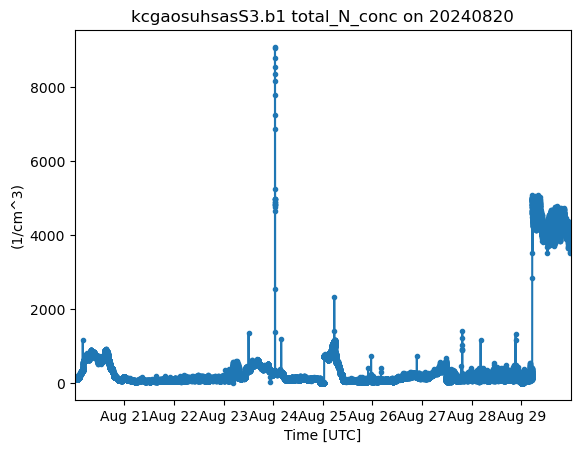

In [5]:
display = act.plotting.TimeSeriesDisplay(ds)
display.plot('total_N_conc')

In [32]:
ds_std = ds['total_N_conc'].rolling(time=10, min_periods=10).std().rolling(time=960, min_periods=10).mean()

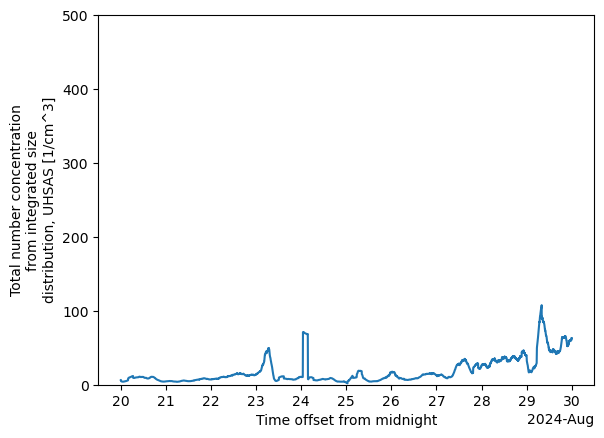

In [33]:
ds_std.plot(ylim=(0,500))